## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.98, 0.95, 0.92]
NESTEROV = [True, False]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = {} and NESTEROV = {}".format(momentum, nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mom-{}-nest-{}".format(momentum, nesterov)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0731 21:07:20.447400  4564 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0731 21:07:20.450400  4564 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0731 21:07:20.477400  4564 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 21:07:20.479400  4564 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 21:07:20.483400  4564 deprecat

Experiment with MOMENTUM = 0.98 and NESTEROV = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.0090 - acc: 0.2744 - val_loss: 1.8242 - val_acc: 0.3569
Epoch 2/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7691 - acc: 0.3697 - val_loss: 1.6892 - val_acc: 0.4074
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6580 - acc: 0.4115 - val_loss: 1.6070 - val_acc: 0.4349
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5936 - acc: 0.4344 - val_loss: 1.5815 - val_acc: 0.4420
Epoch 5/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5394 - acc: 0.4567 - val_loss: 1.5381 - val_acc: 0.4511
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5268 - acc: 0.4553 - val_loss: 1.5091 - val_acc: 0.4663
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4904 - acc: 0.4706 - val_loss: 1.4804 - val_acc

50000/50000 [==============================] - 5s 100us/step - loss: 1.7994 - acc: 0.3695 - val_loss: 1.7500 - val_acc: 0.3832
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7165 - acc: 0.3975 - val_loss: 1.6892 - val_acc: 0.4043
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6585 - acc: 0.4198 - val_loss: 1.6306 - val_acc: 0.4313
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6128 - acc: 0.4374 - val_loss: 1.6082 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5724 - acc: 0.4479 - val_loss: 1.5688 - val_acc: 0.4472
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5368 - acc: 0.4622 - val_loss: 1.5424 - val_acc: 0.4568
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5062 - acc: 0.4729 - val_loss: 1.5286 - val_acc: 0.4578
Epoch 9/50
50000/50000 [=======================

50000/50000 [==============================] - 5s 96us/step - loss: 1.7243 - acc: 0.3930 - val_loss: 1.6843 - val_acc: 0.4132
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6727 - acc: 0.4093 - val_loss: 1.6467 - val_acc: 0.4252
Epoch 5/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6280 - acc: 0.4277 - val_loss: 1.5990 - val_acc: 0.4408
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5860 - acc: 0.4411 - val_loss: 1.5717 - val_acc: 0.4457
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5523 - acc: 0.4554 - val_loss: 1.5463 - val_acc: 0.4585
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5250 - acc: 0.4646 - val_loss: 1.5387 - val_acc: 0.4575
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5024 - acc: 0.4687 - val_loss: 1.5036 - val_acc: 0.4732
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 100us/step - loss: 1.7247 - acc: 0.3954 - val_loss: 1.7072 - val_acc: 0.3952
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6824 - acc: 0.4111 - val_loss: 1.6673 - val_acc: 0.4143
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6465 - acc: 0.4245 - val_loss: 1.6394 - val_acc: 0.4240
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6153 - acc: 0.4348 - val_loss: 1.6125 - val_acc: 0.4324
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5885 - acc: 0.4432 - val_loss: 1.5990 - val_acc: 0.4311
Epoch 9/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5629 - acc: 0.4543 - val_loss: 1.5725 - val_acc: 0.4457
Epoch 10/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5422 - acc: 0.4599 - val_loss: 1.5472 - val_acc: 0.4600
Epoch 11/50
50000/50000 [======================

50000/50000 [==============================] - 5s 95us/step - loss: 1.6781 - acc: 0.4107 - val_loss: 1.6635 - val_acc: 0.4157
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6425 - acc: 0.4223 - val_loss: 1.6349 - val_acc: 0.4239
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6124 - acc: 0.4320 - val_loss: 1.6086 - val_acc: 0.4350
Epoch 8/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5865 - acc: 0.4442 - val_loss: 1.5834 - val_acc: 0.4436
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5659 - acc: 0.4516 - val_loss: 1.5845 - val_acc: 0.4445
Epoch 10/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5456 - acc: 0.4555 - val_loss: 1.5581 - val_acc: 0.4499
Epoch 11/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5234 - acc: 0.4665 - val_loss: 1.5343 - val_acc: 0.4567
Epoch 12/50
50000/50000 [=========================

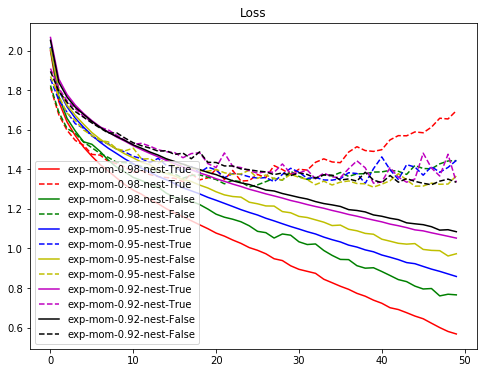

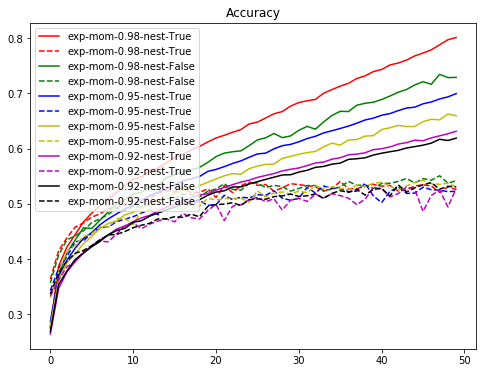

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()